<a href="https://colab.research.google.com/github/LuscasSkywalka/PyTorch-curso/blob/main/PyTorch_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

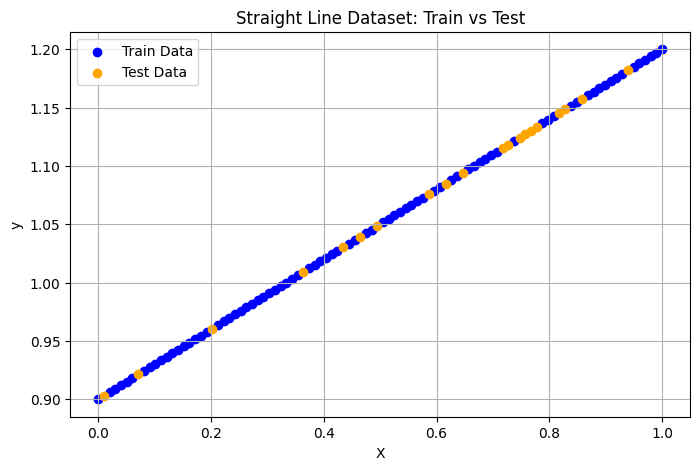

In [1]:
import torch
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

torch.manual_seed(42)

true_weight = 0.3
true_bias = 0.9

X = torch.linspace(0, 1, 100).unsqueeze(1)

y = true_weight * X + true_bias

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

plt.figure(figsize=(8, 5))
plt.scatter(X_train, y_train, label="Train Data", color='blue')
plt.scatter(X_test, y_test, label="Test Data", color='orange')
plt.title("Straight Line Dataset: Train vs Test")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()



In [2]:
from torch import nn

class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weight = nn.Parameter(torch.randn(1, requires_grad=True))
        self.bias = nn.Parameter(torch.randn(1, requires_grad=True))

    def forward(self, x):
        return self.weight * x + self.bias

model = LinearRegressionModel()

print("Model state_dict:")
for param_name, param_tensor in model.state_dict().items():
    print(f"{param_name}: {param_tensor}")


Model state_dict:
weight: tensor([0.3367])
bias: tensor([0.1288])


In [3]:
torch.manual_seed(42)

true_weight = 0.3
true_bias = 0.9
X = torch.linspace(0, 1, 100).unsqueeze(1)
y = true_weight * X + true_bias

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weight = nn.Parameter(torch.randn(1, requires_grad=True))
        self.bias = nn.Parameter(torch.randn(1, requires_grad=True))

    def forward(self, x):
        return self.weight * x + self.bias

model = LinearRegressionModel()

loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model.parameters(), lr=0.01)

epochs = 300

for epoch in range(epochs):
    model.train()

    y_pred = model(X_train)
    loss = loss_fn(y_pred, y_train)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 20 == 0:
        model.eval()
        with torch.inference_mode():
            test_pred = model(X_test)
            test_loss = loss_fn(test_pred, y_test)

        print(f"[Epoch {epoch}] Train Loss: {loss.item():.4f} | Test Loss: {test_loss.item():.4f}")


[Epoch 0] Train Loss: 0.7523 | Test Loss: 0.7428
[Epoch 20] Train Loss: 0.4992 | Test Loss: 0.4977
[Epoch 40] Train Loss: 0.2460 | Test Loss: 0.2525
[Epoch 60] Train Loss: 0.0899 | Test Loss: 0.0910
[Epoch 80] Train Loss: 0.0756 | Test Loss: 0.0672
[Epoch 100] Train Loss: 0.0649 | Test Loss: 0.0566
[Epoch 120] Train Loss: 0.0542 | Test Loss: 0.0467
[Epoch 140] Train Loss: 0.0436 | Test Loss: 0.0371
[Epoch 160] Train Loss: 0.0330 | Test Loss: 0.0280
[Epoch 180] Train Loss: 0.0223 | Test Loss: 0.0188
[Epoch 200] Train Loss: 0.0117 | Test Loss: 0.0096
[Epoch 220] Train Loss: 0.0011 | Test Loss: 0.0019
[Epoch 240] Train Loss: 0.0105 | Test Loss: 0.0019
[Epoch 260] Train Loss: 0.0105 | Test Loss: 0.0019
[Epoch 280] Train Loss: 0.0105 | Test Loss: 0.0019


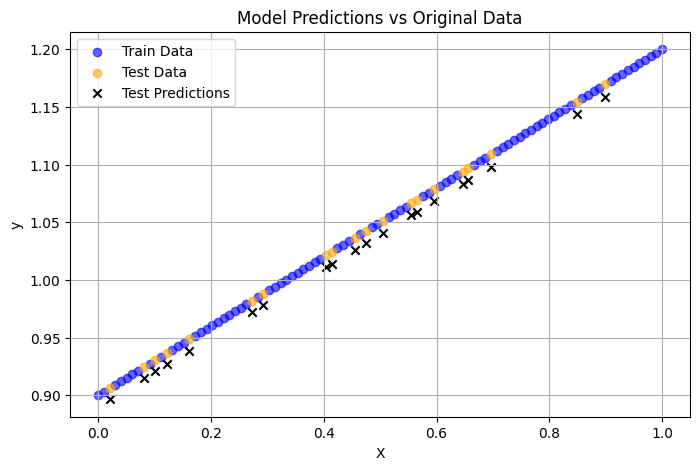

In [4]:
model.eval()
with torch.inference_mode():
    y_test_preds = model(X_test)
    y_train_preds = model(X_train)

plt.figure(figsize=(8, 5))

plt.scatter(X_train, y_train, label="Train Data", color='blue', alpha=0.6)
plt.scatter(X_test, y_test, label="Test Data", color='orange', alpha=0.6)

plt.scatter(X_test, y_test_preds, label="Test Predictions", color='black', marker='x')

plt.title("Model Predictions vs Original Data")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()


In [5]:
torch.save(model.state_dict(), "trained_linear_model.pth")

loaded_model = LinearRegressionModel()

loaded_model.load_state_dict(torch.load("trained_linear_model.pth"))

loaded_model.eval()

with torch.inference_mode():
    loaded_test_preds = loaded_model(X_test)

match = torch.allclose(loaded_test_preds, y_test_preds)

print(f"Do loaded model predictions match original predictions? {'✅ Yes' if match else '❌ No'}")
print("\nOriginal predictions (first 5):", y_test_preds[:5].squeeze())
print("Loaded model predictions (first 5):", loaded_test_preds[:5].squeeze())



Do loaded model predictions match original predictions? ✅ Yes

Original predictions (first 5): tensor([1.0260, 1.0320, 1.0561, 1.0832, 0.9718])
Loaded model predictions (first 5): tensor([1.0260, 1.0320, 1.0561, 1.0832, 0.9718])
